In [ ]:
# Empty file Memory: 107.2 MB

In [1]:
# + 54.3 Mb Memory: 161.5
import random
import numpy as np
import pandas as pd

In [2]:
!ls data

df_users_sub.json places.json       reviews.json      users.json


In [ ]:
%%time
# users.json 764.2 Mb
# places.json 1.07 Gb
# reviews.json 4.57 Gb
df = pd.read_json('data/users.json')  # Wall time: 46.9 s, 7.9 GB, or + 7.7 Gb from .764 Gb * 10 ?
# df.shape # (3,747,937, 6)
# df.columns ['userName', 'jobs', 'currentPlace', 'previousPlaces', 'education', 'gPlusUserId']

In [3]:
%%time
# users.json 764.2 Mb
# places.json 1.07 Gb
# reviews.json 4.57 Gb
df = pd.read_json('data/places.json')  # Wall time: 1min 14s, Memory: 9.5 GB
# df.shape # (3,114,353, 8)
# df.columns ['name', 'price', 'address', 'hours', 'phone', 'closed', 'gPlusPlaceId', 'gps']
# df.gps[0] [33.703804, -117.003209]
# in the Southern hemisphere (negative latitudes)
# df.gps[0][0] # 33.703804 latitude North-South
# Positive longitudes are east of the prime meridian, and negative ones are west
# df.gps[0][1] # -117.003209 longitude East-West
# df.address[0] # ['2615 Angler Ave', 'Hemet, CA 92545'] Checks out in google maps

CPU times: user 37.2 s, sys: 2.95 s, total: 40.2 s
Wall time: 43.1 s


In [4]:
# df.gps.dropna().shape # df.gps.shape (3114353,) #df.gps.dropna().shape (3087402,), 26951 no gps data
gps = pd.DataFrame(df.gps.dropna().to_list(), columns = ['NS_latitudes','EW_longitudes']) #.str.split(',', expand=True)
gps.head()

,NS_latitudes,EW_longitudes
0,33.703804,-117.003209
1,38.979759,-76.547538
2,43.227760,44.762726
3,43.529494,-96.792244
4,-2.976256,104.742662


In [7]:
whos

Variable   Type         Data/Info
---------------------------------
gps        DataFrame             NS_latitudes  EW<...>3087402 rows x 2 columns]
np         module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
random     module       <module 'random' from '/U<...>lib/python3.7/random.py'>


In [8]:
# https://github.com/chrisshaffer/fraud-detection-case-study/blob/main/src/Map_Plots.ipynb
# GPS plots
import matplotlib.pyplot as plt
import geopandas as gpd  # no geopandas in base environment
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [9]:
font_size = 20
plt.rc('font', size=font_size) #controls default text size
plt.rc('axes', titlesize=font_size) #fontsize of the title
plt.rc('axes', labelsize=font_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=font_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=font_size) #fontsize of the legend

In [37]:
gps.shape

(3087402, 2)

In [45]:
# Combined filter can only be true if both coordinates are correct
ser1 = pd.Series([True,True,False,False])
ser2 = pd.Series([True,False,True,False])
ser1 & ser2

0     True
1    False
2    False
3    False
dtype: bool

True     3011584
False      75818
dtype: int64

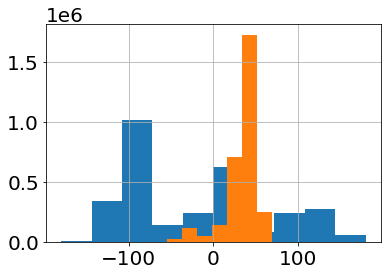

In [46]:
EW_filter=abs(gps.EW_longitudes) <= 180
# > 180 False    3012033, True       75369
# <= True     3012033, False      75369 (2.44%) 75369/3087402*100
gps.EW_longitudes[EW_filter].hist()
EW_filter.value_counts()  # ~ -3087403
# EW_filter

NS_filter=abs(gps.NS_latitudes) <= 90
# <= True     3011647, False      75755 (2.45%) 75755/3087402*100
gps.NS_latitudes[NS_filter].hist()
NS_filter.value_counts()  # ~ -3087403
# NS_filter

gps_value_filter = EW_filter & NS_filter # only True True pairs result in True
# True     3011584, False      75818 (2.45%) 75818/3087402*100
gps_value_filter.value_counts()

In [18]:
max(gps.EW_longitudes), min(gps.EW_longitudes)

(178054936.0, -159601736.0)

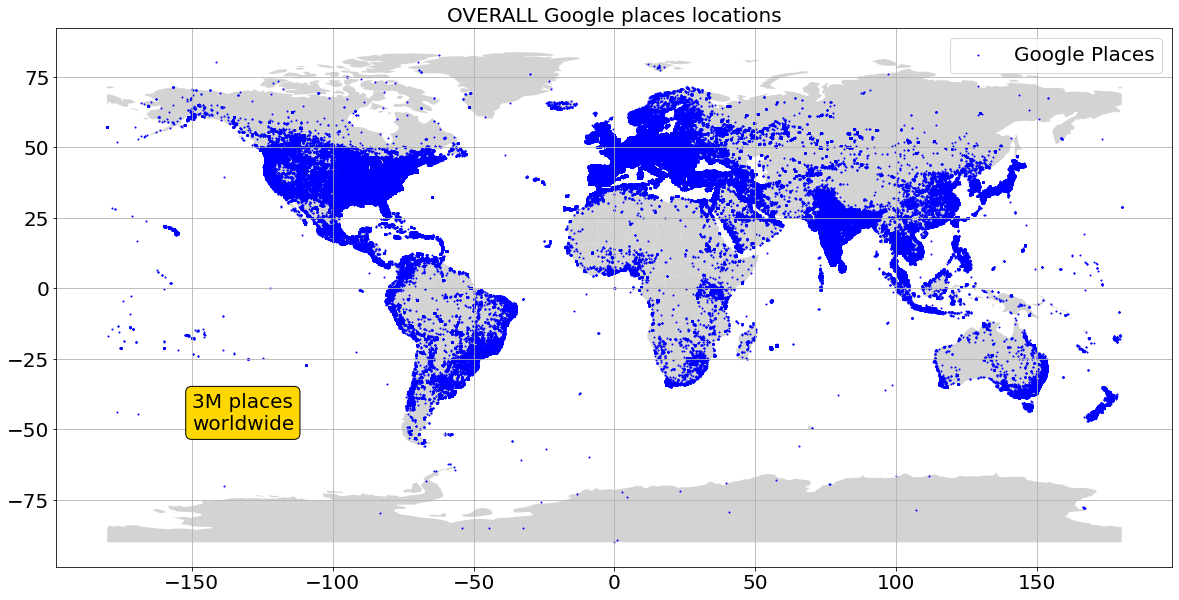

In [54]:
countries.plot(color="lightgrey", figsize=(20,15)) # color="lightgrey"
plt.scatter(gps.EW_longitudes[gps_value_filter],
            gps.NS_latitudes[gps_value_filter], s=1,
            color='b', label='Google Places')

plt.title('OVERALL Google places locations')
box = {'facecolor': 'gold',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }
plt.text(-150, -50, '3M places\nworldwide', bbox=box)
plt.legend()
plt.grid()
plt.savefig('img/Places_TOTAL.png', facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight')

In [ ]:
# help(df.sample)
# df_users_sub = df.sample(n=10000, random_state=1) # frac=0.1
# # df_users_sub.head()
# # df_users_sub.shape # (10000, 6)
# df_users_sub.to_json('data/df_users_sub.json')
# del df, df_users_sub
# %%time
# df_users_sub = pd.read_json('data/df_users_sub.json') # Wall time: 263 ms
# df_users_sub.head()

In [60]:
import sys
sys.modules['geopandas']

<module 'geopandas' from '/Users/alexey_imac/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/geopandas/__init__.py'>